<a href="https://colab.research.google.com/github/davidharket/Custom_Data_CNN_Classifier/blob/main/PyTorch_Custom_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets:'

* How to get your own data into PyTorch
* One way is via **Custom Datasets**

## Domain libraries

Depending on what you're working on, look into different torch librariesmm

In [260]:
# Import torch and setting up device-agnostic code
import torch
from torch import nn


# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# 1. Let's get some data

Our data is a subset of the Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class(750 training, 250 testing).

Our dataset starts with 3 classes of food and 10% of the images (75 training, 25 testing).

Why?

When staring ML projects it's better to try things on a small scale and then increase the scale when necessary
The whole oint is to speed up how fast you can experiment

In [261]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
  print("The directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

#Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

The directory already exists... skipping download
Unzipping pizza, steak and sushi data...


In [262]:
image_path

PosixPath('data/pizza_steak_sushi')

## 2. Becoming one with the data (data preparation and data exploration)

In [263]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_paht returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [264]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [265]:
# Setup out training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualizing an image

1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the images with Pythons PIL
4. We'll then show the image an print metadata


data/pizza_steak_sushi/train/pizza/393658.jpg
pizza
Random image path: data/pizza_steak_sushi/train/pizza/393658.jpg
Image class: pizza
Image height: 383
Image widht: 512


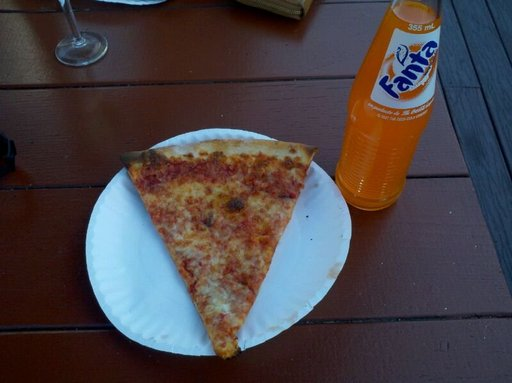

In [266]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a ranodm image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class form path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image usin PIL
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image widht: {img.width}")
img

Image class:pizza| Image shape: (383, 512, 3) -> [height, width, color_channels]|


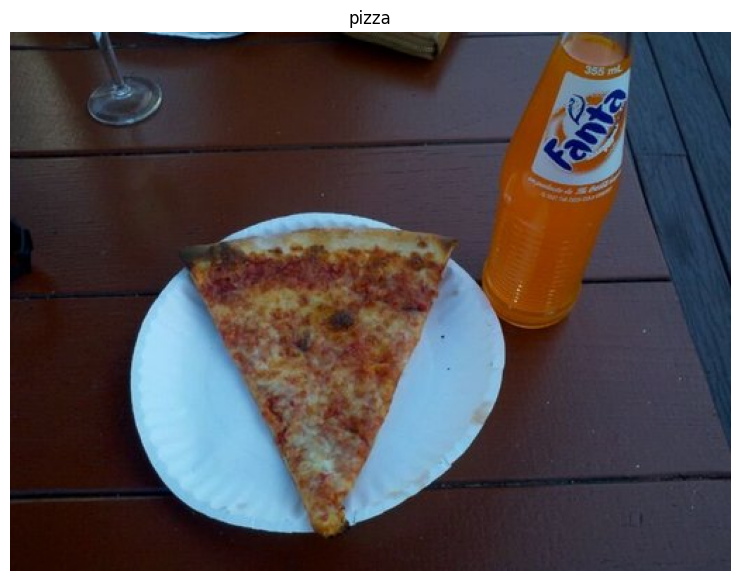

In [267]:
import matplotlib.pyplot as plt
import numpy as np


# Turn image into array
img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(image_class)
print(f"Image class:{image_class}| Image shape: {img_as_array.shape} -> [height, width, color_channels]|")
plt.axis(False);

In [268]:
img_as_array

array([[[70, 63, 55],
        [60, 53, 45],
        [55, 51, 42],
        ...,
        [32, 58, 81],
        [32, 58, 81],
        [33, 59, 82]],

       [[72, 65, 57],
        [64, 57, 49],
        [60, 56, 47],
        ...,
        [32, 58, 81],
        [32, 58, 81],
        [32, 58, 81]],

       [[68, 61, 51],
        [64, 57, 47],
        [61, 57, 46],
        ...,
        [33, 59, 82],
        [32, 58, 81],
        [31, 57, 80]],

       ...,

       [[34,  7,  0],
        [35,  8,  1],
        [34,  7,  0],
        ...,
        [51, 53, 68],
        [51, 53, 68],
        [50, 52, 67]],

       [[33,  6,  0],
        [34,  7,  0],
        [33,  6,  0],
        ...,
        [52, 54, 69],
        [53, 55, 70],
        [53, 55, 70]],

       [[33,  6,  0],
        [34,  7,  0],
        [34,  7,  0],
        ...,
        [53, 55, 70],
        [54, 56, 71],
        [54, 56, 71]]], dtype=uint8)

## 3. Transforming data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of our images)
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these Dataset and DataLoder


In [269]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### 3.1 Transforming data with torchvision.transforms

Transforms help you get your images ready to be used with a model /perform data augmentationl

In [270]:
# Write a transform from image
data_transform = transforms.Compose([
    # Resize out images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horisontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn image into a torch.tensor
    transforms.ToTensor()
])

In [271]:
data_transform(img).shape

torch.Size([3, 64, 64])

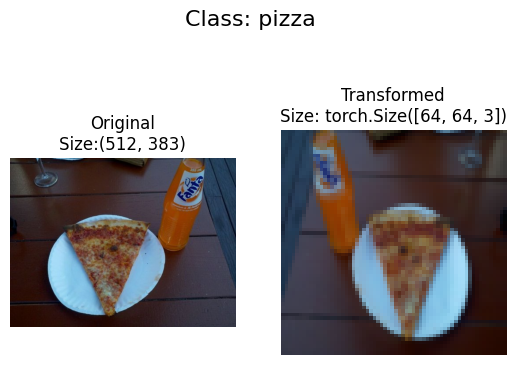

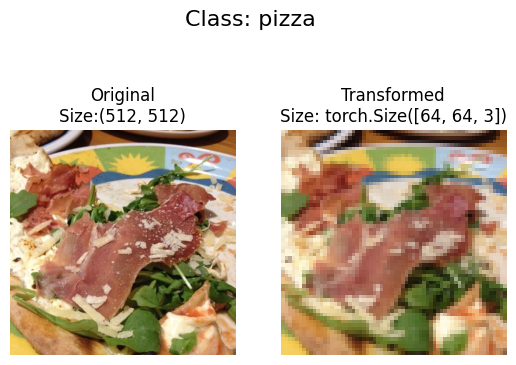

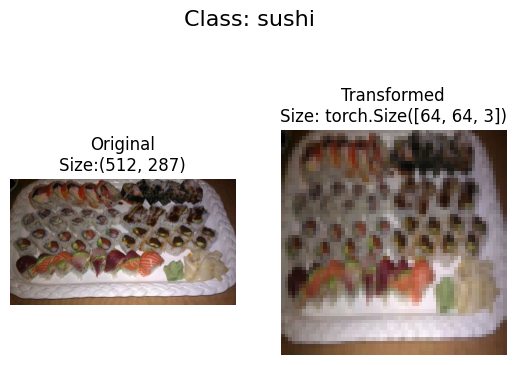

In [272]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms them then plots the original vs the transformed ones
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will have to change shape for matplot lib (C,H,W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)



## 4. Option 1: Load image data using ´ÌmageFolder´

We can load image classification data usin ´torchvison.datasets.ImageFolder´

In [273]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # A transform for the data
                                  target_transform=None) # A transform for the label/target
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)
train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [274]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [275]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [276]:
len(train_data), len(test_data)

(225, 75)

In [277]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [278]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

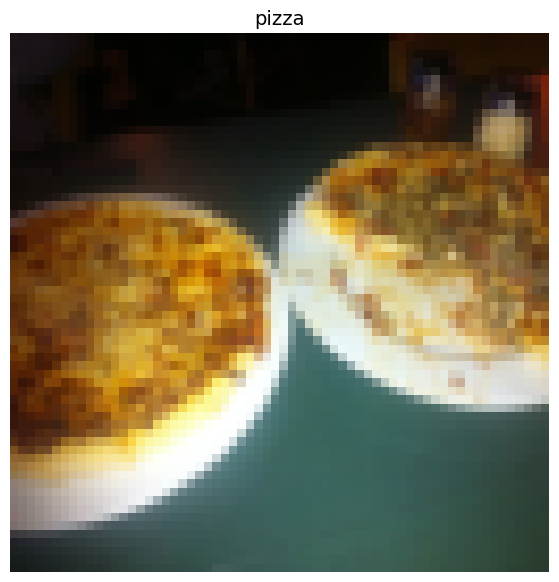

In [279]:
# Rearrange the order dimension
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape}")
# Plo the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14 )

In [280]:
from torch.utils.data import DataLoader

BATCHSIZE = 1

#Turning data into iterables with customizable batchsize
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCHSIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCHSIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)


In [281]:
img, label = next(iter(train_dataloader))

# Batch size will be 1, you can change the size if you likem
print(f"Imag shape: {img.shape} -> [batch_size, color_channels, height, width]")

Imag shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]


## 5. Option 2: Loading Image data with a custom dataset
1. Load images from file
2. Get class names from the dataset
3. Get classes into dictionary format from the dataset

pro:
* Create a ´Dataset´ out of alomst anythong
* Not limited to PyTorch pre-built `Dataset`

cons:
* Even though you could create `Dataset` out of anything, it does not neccicarily work
* Leads to more code


In [282]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [283]:
# Instance of torchvision.dataset.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

from matplotlib.cbook import to_filehandle
### 5.1 Creating a helper function to get class names

We want function to:
1. Get class names using `os.scandir()` to tranverse a target directory (idealy the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the file forma )
3. Turn the class names into a dict  and a list and return them

In [284]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the targett directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [285]:
def find_classes(directory:str) -> Tuple[list[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure")

  # 3. Create a dictionary of index labels (computers prefer numers rather than string label)
  classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, classes_to_idx

In [286]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `dataset` to replicate `ImageFolder` (subclassing `torch.utils.data.Dataset`)

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform out data.
3. Create several attributes
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * classes_to_idx - a dict of the target classes mapped to integer `labels`
4. Create a funtion to `load_images()`, that will open images
5. Overwrite the `__len()__` methrod to return the lenght of our dataset
6. Overwrite the `__getitem()__`method to return a given sample when passed an indexm
                                                                                           

In [287]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1. Sublass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self, targ_dir:str, transform=None):

    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transforms
    self.transform = transform
    # Create classes and class_to_idx
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem()__ method to return a particular samples
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X,y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y )
    else:
      return img, class_idx # return untransformed image and label


In [288]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor()
                                       ])
test_transforms = transforms.Compose([transforms.Resize(size=(64, 64)),
                                                        transforms.ToTensor()])

In [289]:
train_data_custom =ImageFolderCustom(targ_dir=train_dir,
                                     transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [290]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7de590d01540>,
 <__main__.ImageFolderCustom at 0x7de590d03940>)

In [291]:
len(test_data_custom), len(test_data_custom)

(75, 75)

In [292]:
len(train_data_custom), len(train_data)

(225, 225)

In [293]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [294]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)
print(train_data_custom.class_to_idx==train_data.class_to_idx)
print(test_data_custom.class_to_idx==test_data.class_to_idx)

True
True
True
True


### 5.3 Create a function to display random images

1. Take in a `Datset` and a number of other parametesr such as class names an how many images to visualize
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set a random seed for reproducibility
4. Get a list of random sample indexes from the traget datasets.
5. Setup a matplotlib plot
6.  Loop through the random samples and plot them with matplotlib
7. Make sure dimensions of our image line up with matplotlib(HWC)

In [295]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes n shouldn't be lager than 10, setting the display_shape to 10...")
  # 3. sET THE SEED
  if seed:
    random.seed(seed)
  # 4. Get random sample image
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16,8))

  # 6. Loop through random idx and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimension for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

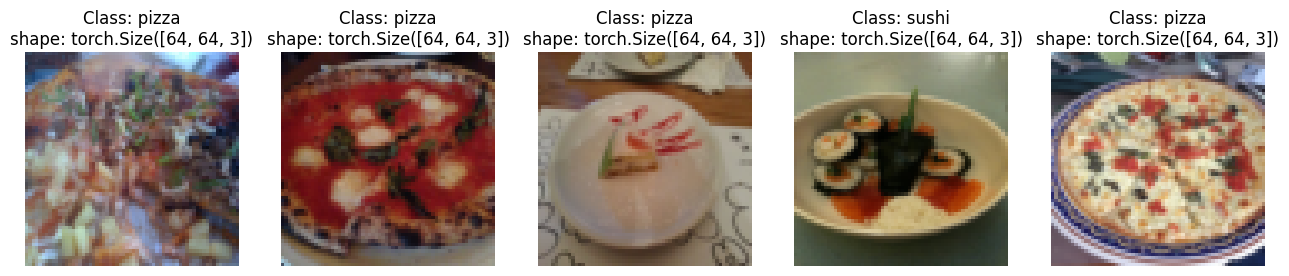

In [296]:
# Display random images from data
display_random_images(dataset=train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes n shouldn't be lager than 10, setting the display_shape to 10...


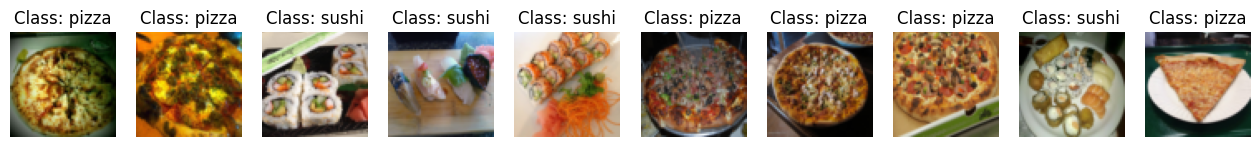

In [297]:
display_random_images(dataset=test_data_custom,
                      n=20,
                      classes=class_names,
                      seed=42)

### Turn custom loaded images into `dataloader`'s

In [298]:
from torch.utils.data import DataLoader
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 1
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS, # Alters amout of compute
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False
                                    )

In [299]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7de591216ce0>,
 <torch.utils.data.dataloader.DataLoader at 0x7de591217c70>)

In [300]:
img_custom, label_custom = next(iter(train_dataloader_custom))

#print shape
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 6. Other types of transforms (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this entails applying various image transformation to the training images

This practice hopefully results in a model thats more generalizable for unseen data

Lets take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels.

In [301]:
# Let's look at TrivialAugment
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize (size=(224,224)),
                                     transforms.ToTensor()])


In [302]:
image_path

PosixPath('data/pizza_steak_sushi')

In [303]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/2992084.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/786995.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/853441.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1044789.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2821048.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/220190.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2228322.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2426686.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1285298.jpg')]

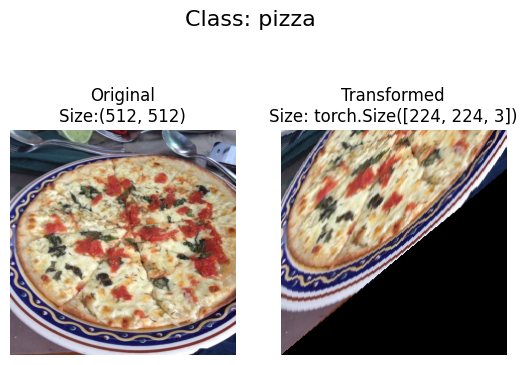

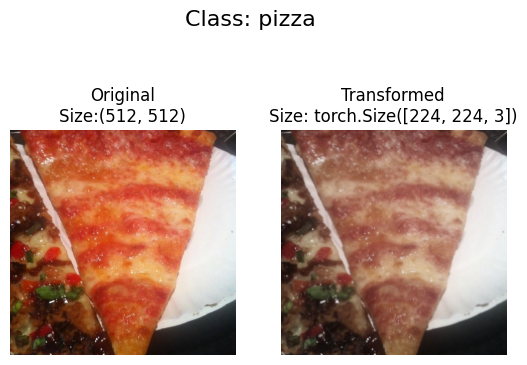

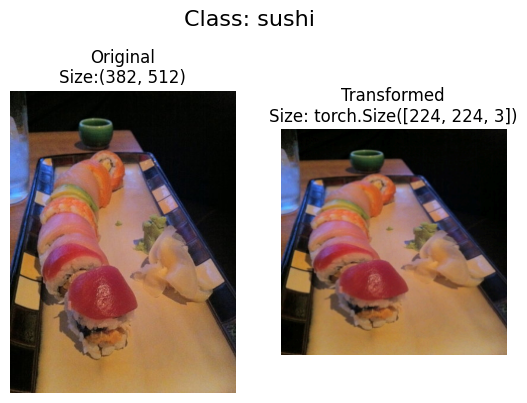

In [304]:
# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3
)

## Model 0: TinyVVG without data augmentation

Replication of tinyVVG architecture

### 7.1 Creating transforms and loading data for model 0

In [305]:
# Create a simple transform

simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()
])

In [306]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS =os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False)
print(type(test_dataloader_simple))

<class 'torch.utils.data.dataloader.DataLoader'>


In [307]:
from IPython.core.completer import rectify_completions
from torch.nn.modules.pooling import MaxPool2d
class CustomDataModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Default stride is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion

In [308]:
torch.manual_seed(42)
model_0 = CustomDataModelV0(input_shape=3,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [309]:
torch.manual_seed(42)

epochs = 1

for epoch in range(epochs):
  model_0.train()
  for batch, (X, y) in enumerate(train_dataloader_simple):
    X = X.to(device)
    y_pred = model_0(X)

In [310]:
# get a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch, label_batch = image_batch.to(device), label_batch.to(device)
image_batch.shape, label_batch.shape
model_0(image_batch)

tensor([[ 0.0234, -0.0037,  0.0105],
        [ 0.0231, -0.0033,  0.0099],
        [ 0.0214, -0.0050,  0.0091],
        [ 0.0208,  0.0013,  0.0097],
        [ 0.0207, -0.0047,  0.0110],
        [ 0.0180,  0.0007,  0.0089],
        [ 0.0244, -0.0033,  0.0096],
        [ 0.0204, -0.0030,  0.0096],
        [ 0.0211, -0.0053,  0.0115],
        [ 0.0202,  0.0004,  0.0109],
        [ 0.0193,  0.0004,  0.0073],
        [ 0.0189,  0.0039,  0.0094],
        [ 0.0199,  0.0007,  0.0108],
        [ 0.0247, -0.0032,  0.0111],
        [ 0.0202, -0.0023,  0.0073],
        [ 0.0213, -0.0016,  0.0096],
        [ 0.0244, -0.0004,  0.0076],
        [ 0.0204, -0.0033,  0.0118],
        [ 0.0183,  0.0015,  0.0105],
        [ 0.0217, -0.0024,  0.0076],
        [ 0.0181,  0.0058,  0.0059],
        [ 0.0199,  0.0022,  0.0112],
        [ 0.0212, -0.0044,  0.0115],
        [ 0.0224, -0.0032,  0.0089],
        [ 0.0217, -0.0027,  0.0085],
        [ 0.0230, -0.0031,  0.0047],
        [ 0.0219, -0.0002,  0.0091],
 

### Use torchinfo to find out what is going on in our model

In [311]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
CustomDataModelV0                        [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [312]:
# Create train step
def train_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

#Create test step
def test_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.CrossEntropyLoss,
               device=device):

  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()


      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y).sum().item()/len(test_pred_labels))


  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [313]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

In [314]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
      train_dataloader: torch.utils.data.DataLoader,
      test_dataloader: torch.utils.data.DataLoader,
      loss_fn: torch.nn.Module,
      optimizer: torch.optim.Optimizer,
      epochs: int = 5,
      device=device):


  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}


  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    print(f"|Train loss:{train_loss:.4f}| train accuracy: {train_acc:.4f}|Test loss: {test_loss:.4f}|Test accuracy: {test_acc:.4f}|")

    # Update result dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)


  return results

In [315]:
torch.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

from timeit import default_timer as timer

start_time = timer()

model_0_results = train(model=model_0,
      train_dataloader=train_dataloader_simple,
      test_dataloader=test_dataloader_simple,
      loss_fn=loss_fn,
      optimizer=optimizer,
      epochs=5,
      device=device)
end_time = timer()

print(f"Total training time {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

|Train loss:1.1035| train accuracy: 0.2500|Test loss: 1.0993|Test accuracy: 0.2604|
|Train loss:1.0761| train accuracy: 0.4258|Test loss: 1.1300|Test accuracy: 0.2604|
|Train loss:1.0724| train accuracy: 0.4258|Test loss: 1.1622|Test accuracy: 0.2604|
|Train loss:1.1099| train accuracy: 0.3047|Test loss: 1.1516|Test accuracy: 0.2708|
|Train loss:1.0834| train accuracy: 0.3555|Test loss: 1.1496|Test accuracy: 0.2396|
Total training time 22.512 seconds


#Plot the loss curves of model_0

In [316]:
model_0_results

{'train_loss': [1.1035425812005997,
  1.0761159732937813,
  1.0724116116762161,
  1.1098963618278503,
  1.083447739481926],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.35546875],
 'test_loss': [1.099348545074463,
  1.1299594640731812,
  1.1622153123219807,
  1.1515857179959614,
  1.149577021598816],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2708333333333333,
  0.23958333333333334]}

In [317]:
def plot_loss_curv(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary"""
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs,test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

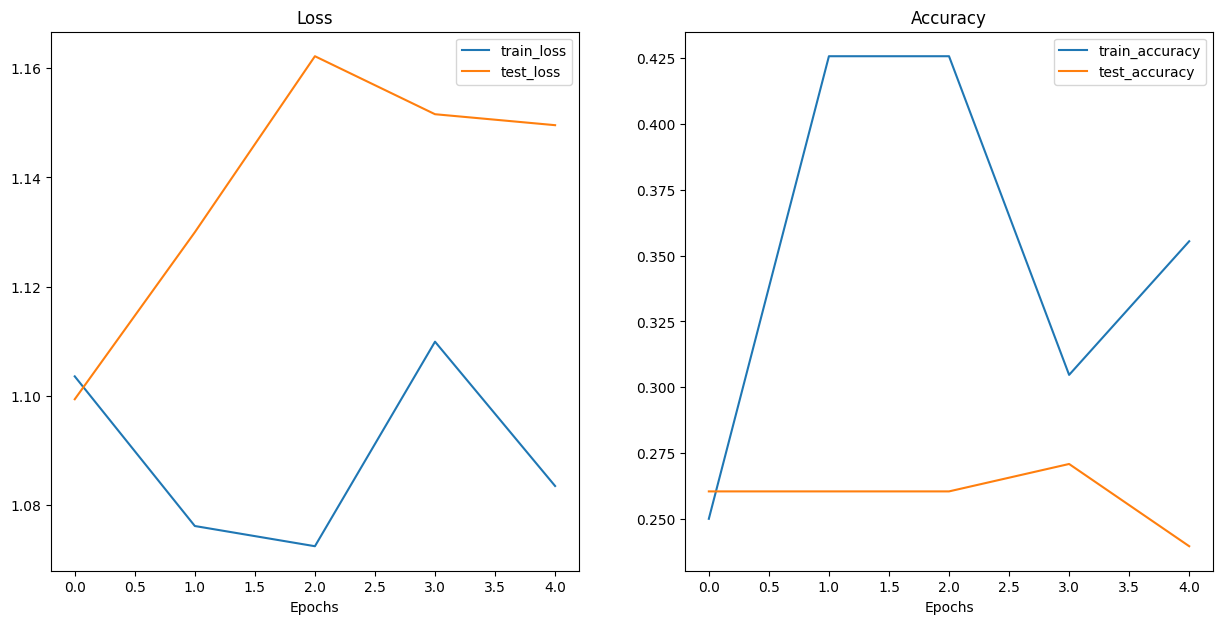

In [318]:
plot_loss_curv(model_0_results)

## Model 1: TinyVVG with Data Augmentation

Try another modelling experminet. Same model as before but with data augmentation

In [319]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transforms_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                               transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                               transforms.ToTensor()])

test_transforms_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                              transforms.ToTensor()])

In [320]:
from torchvision import datasets
train_data_trivial = datasets.ImageFolder(root=train_dir,
                                     transform=train_transforms_trivial)
test_data_trivial = datasets.ImageFolder(root=test_dir,
                                     transform=test_transforms_trivial)

In [321]:
import os
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32
train_dataloader_trivial = DataLoader(dataset=train_data_trivial,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,
                                      num_workers=NUM_WORKERS)
test_dataloader_trivial = DataLoader(dataset=test_data_trivial,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)

In [322]:
torch.manual_seed(42)
model_1 = CustomDataModelV0(input_shape=3,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
model_1

CustomDataModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [323]:
from timeit import default_timer as timer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)

timer_start = timer()
model_1_results = train(model=model_1,
      train_dataloader=train_dataloader_trivial,
      test_dataloader=test_dataloader_trivial,
      loss_fn=loss_fn,
      optimizer=optimizer,
      epochs=5)
timer_end = timer()
print(f"Training took {timer_end - timer_start:.3f} seconds to complete...")

  0%|          | 0/5 [00:00<?, ?it/s]

|Train loss:1.1069| train accuracy: 0.3047|Test loss: 1.0993|Test accuracy: 0.2604|
|Train loss:1.1019| train accuracy: 0.3203|Test loss: 1.0719|Test accuracy: 0.5417|
|Train loss:1.0917| train accuracy: 0.4375|Test loss: 1.0846|Test accuracy: 0.4924|
|Train loss:1.0916| train accuracy: 0.3125|Test loss: 1.0678|Test accuracy: 0.5833|
|Train loss:1.0862| train accuracy: 0.3594|Test loss: 1.0752|Test accuracy: 0.5436|
Training took 23.032 seconds to complete...


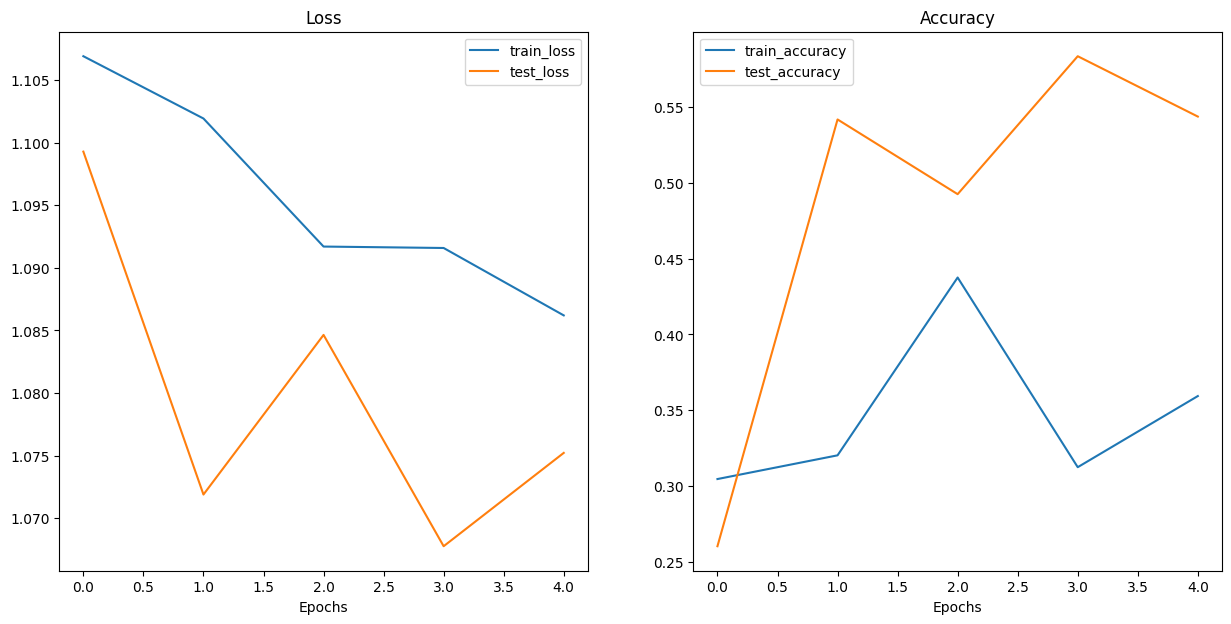

In [324]:
plot_loss_curv(model_1_results)

, testing
## Compare model results

importatnt to compare models after individual testing

1. Hard Code
2. PyTorch + Tensorboard
3. Weights and biases
4. MLFLOW

In [325]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

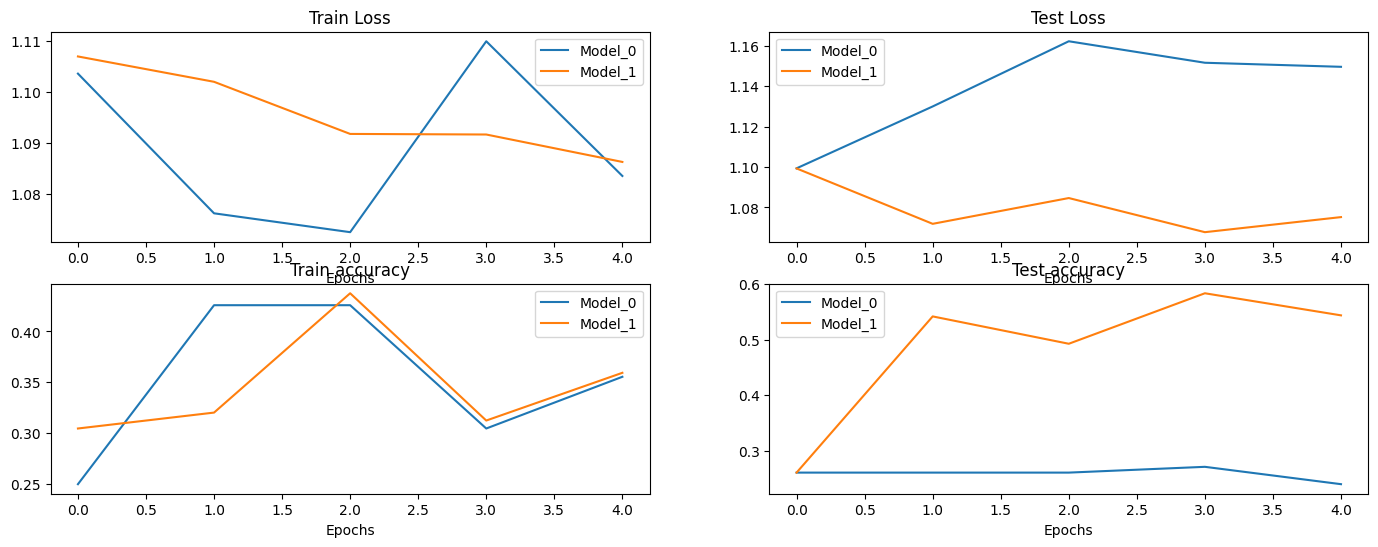

In [326]:
plt.figure(figsize=(17, 6))

epochs = range(len(model_0_df))

#Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model_0")
plt.plot(epochs, model_1_df["train_loss"], label="Model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()
#Plot test loss

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label="Model_0")
plt.plot(epochs, model_1_df["test_loss"], label="Model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()
#Plot train accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="Model_0")
plt.plot(epochs,model_1_df["train_acc"], label="Model_1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.legend()

#plot test accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="Model_0")
plt.plot(epochs, model_1_df["test_acc"], label="Model_1")
plt.title("Test accuracy")
plt.xlabel("Epochs")
plt.legend()



In [327]:
# Download a custom image
import requests

# Setup custom imgae path
custom_image_path = data_path / "04-pizza-pick.jpg"

# Download the image if it does not already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    #Use raw file link
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download")

data/04-pizza-pick.jpg already exists, skipping download


## Loading in a custom imgage with PyTorch

Make sure custom image is in the same format as the data out model was trained on

* In tensor form with datatype (torch.float32)
* Shape 64,64,3
* on the right device

In [328]:
import torchvision

#read on custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))/ 255
print(f"custom image tensor:\n {custom_image_uint8}")
print(f"custom image shape:\n {custom_image_uint8.shape}")
print(f"custom image datatype:\n {custom_image_uint8.dtype}")

custom image tensor:
 tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  .

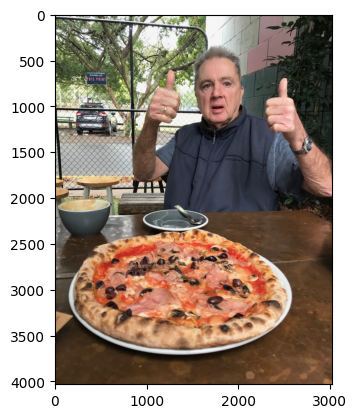

In [329]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [330]:
from torchvision import transforms

custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])
custom_image_transformed = custom_image_transform(custom_image_uint8)
custom_image_transformed.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 64, 64])

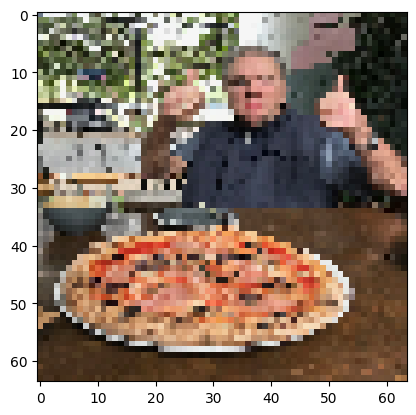

In [331]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [332]:
#This will error, wrong device
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed)

RuntimeError: ignored

In [ ]:
# This will error, no batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))

In [334]:
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [335]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[-0.1212, -0.0168, -0.0035]])

from tables.exceptions import DataTypeWarning
note:

* Load the image and turn it into a tensor
* Make sure the image was the same DataType (float32)
* Make sure the image was the same shape as the data the model was trained on, within a batch size
* Make sure the image was on the same device as our model

In [336]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3091, 0.3432, 0.3477]])

In [337]:
# Convert prediction to probabilities -> prediciton labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([2])

In [338]:
class_names[custom_image_pred_labels]

'sushi'

# Functionizing image prediction

Give an image path and  have our model predict on that image and plot the image + prediction

In [361]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transforms=None,
                        device=device):
  """Makes a prediction on a target image with a trained model an plots the image and predicitons"""
  #load image
  target_image  = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between 0 and 1
  target_image = target_image / 225

  # Transform if necessary
  if transforms:
    target_image = transforms(target_image)

  # make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    #Add an extra dimesion to the image
    target_image = target_image.unsqueeze(0)

    target_image_pred = model(target_image.to(device))
  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the prediction
  plt.imshow(target_image.squeeze().permute(1,2,0)) # Remove batch dimension and rearrange the shape to be HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]}| Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label}| Prob: {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)



/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


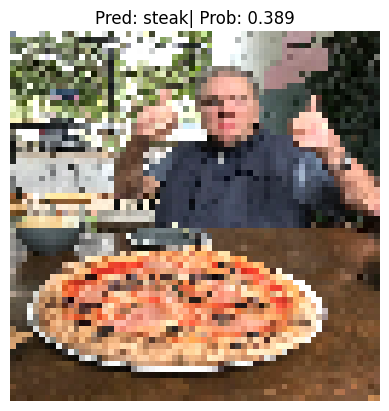

In [363]:
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transforms=custom_image_transform,
                    device=device)

In [ ]:
# Download a custom image
import requests

# Setup custom imgae path
custom_image_path = data_path / "04-pizza-pick.jpg"

# Download the image if it does not already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    #Use raw file link
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download")

import torchvision

#read on custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))/ 255
print(f"custom image tensor:\n {custom_image_uint8}")
print(f"custom image shape:\n {custom_image_uint8.shape}")
print(f"custom image datatype:\n {custom_image_uint8.dtype}")

  from torchvision import transforms

custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])
custom_image_transformed = custom_image_transform(custom_image_uint8)
custom_image_transformed.shape